In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [2]:
# quantum circuit to make a Bell state 
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

Bell basis states have perfect correlation between measurements in the |0> |1> basis
e.g. (1/root(2)) (|00> + |11>)

first qubit measured with 50% certainty, second qubit measurement will be the same as first because of collapse and entanglement

hadamard on first qubit, then cnot on second qubit (with first as target) to create [remember cnot flips qubit if and only if target is |1>]

In [3]:
meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])
circ = bell + meas
circ.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [4]:
# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 470, '00': 530}


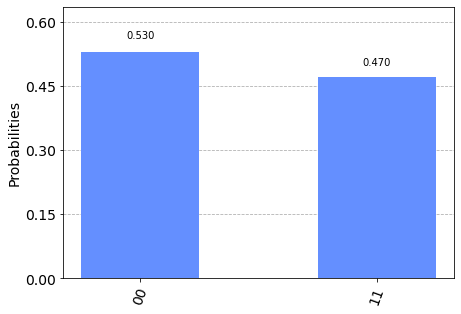

In [5]:
plot_histogram(counts)

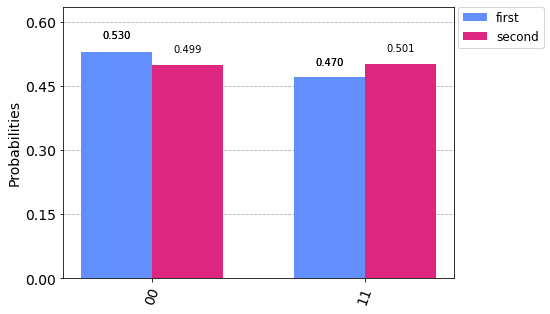

In [9]:
result_2 = execute(circ, backend, shots=1000).result()
counts_2 = result_2.get_counts(circ)

legend = ['first', 'second']
plot_histogram([counts, counts_2], legend=legend)

In [10]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [11]:
backend = BasicAer.get_backend('statevector_simulator')
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

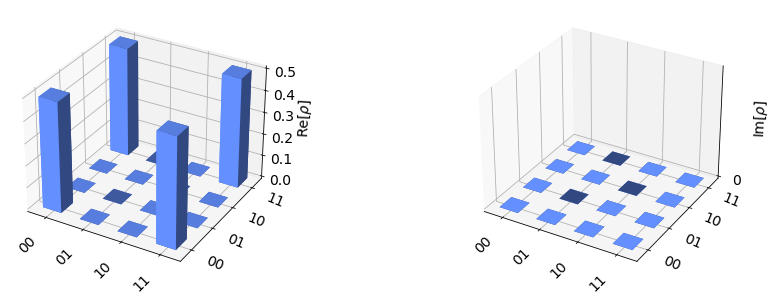

In [12]:
plot_state_city(psi)

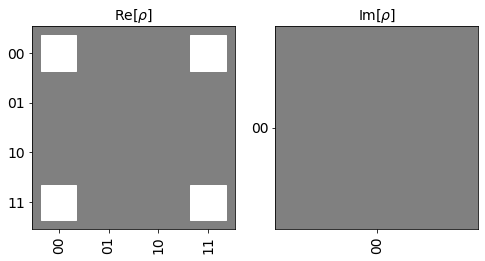

In [13]:
plot_state_hinton(psi)

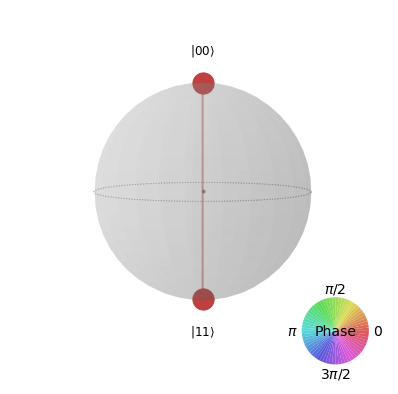

In [15]:
plot_state_qsphere(psi)

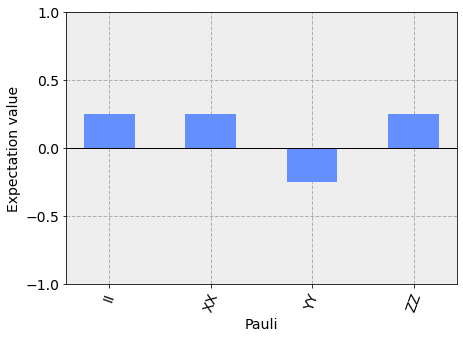

In [16]:
plot_state_paulivec(psi)

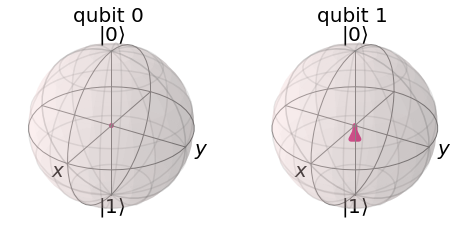

In [17]:
plot_bloch_multivector(psi)